In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import colorsys
import argparse
import imutils
import random
import os
import sys
from google.colab.patches import cv2_imshow

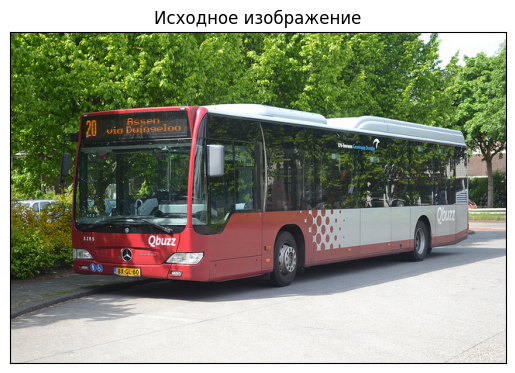

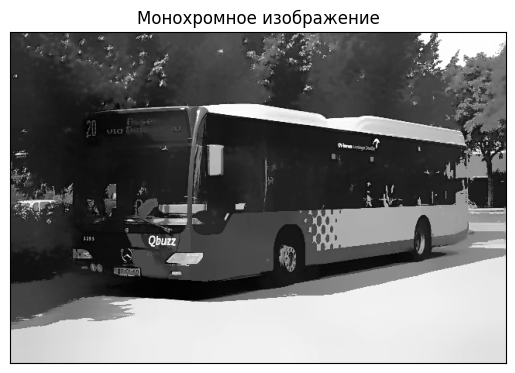

In [2]:
img = cv2.imread('/content/Comp_Vision_Task_5_File_6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.show()
shifted = cv2.pyrMeanShiftFiltering(img, 21, 51)
gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, 'gray')
plt.title('Монохромное изображение'), plt.xticks([]), plt.yticks([])
plt.show()

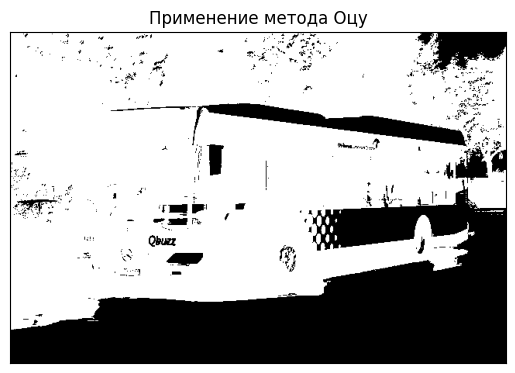

In [3]:
thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
plt.imshow(thresh, 'gray')
plt.title('Применение метода Оцу'), plt.xticks([]), plt.yticks([])
plt.show()

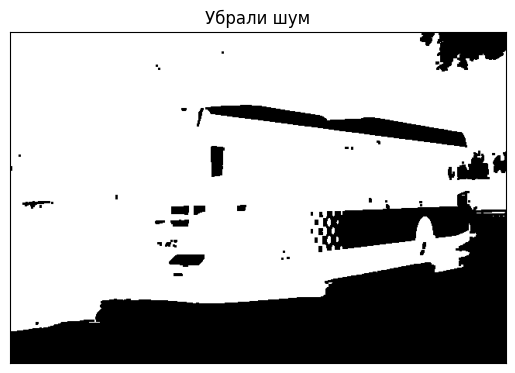

In [4]:
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, np.ones((2,2),np.uint8), iterations = 2)
plt.imshow(closing, 'gray')
plt.title('Убрали шум'), plt.xticks([]), plt.yticks([])
plt.show()

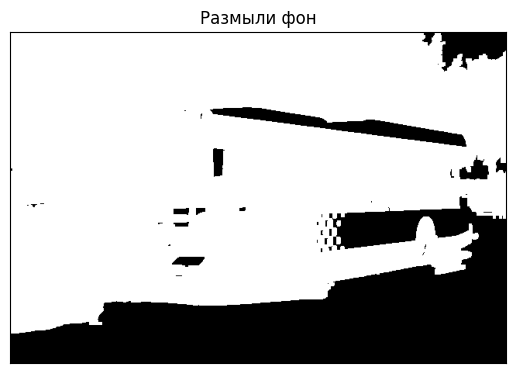

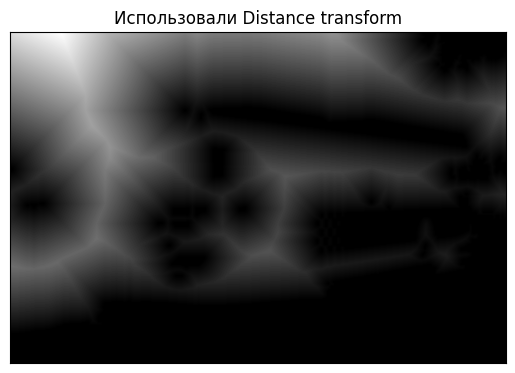

In [5]:
sure_bg = cv2.dilate(closing,np.ones((2,2),np.uint8),iterations=3)
plt.imshow(sure_bg, 'gray')
plt.title('Размыли фон'), plt.xticks([]), plt.yticks([])
plt.show()
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
plt.imshow(dist_transform, 'gray')
plt.title('Использовали Distance transform'), plt.xticks([]), plt.yticks([])
plt.show()

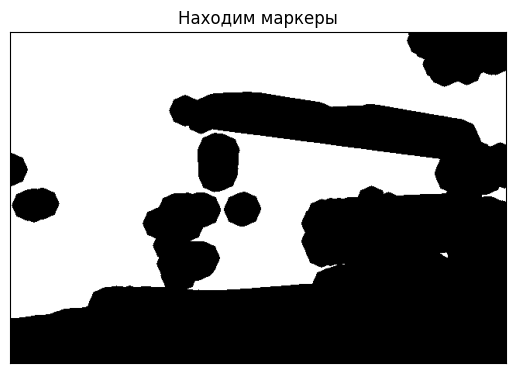

In [6]:
sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)[1]
sure_fg = np.uint8(sure_fg)
plt.imshow(sure_fg, 'gray')
plt.title("Находим маркеры"), plt.xticks([]), plt.yticks([])
plt.show()

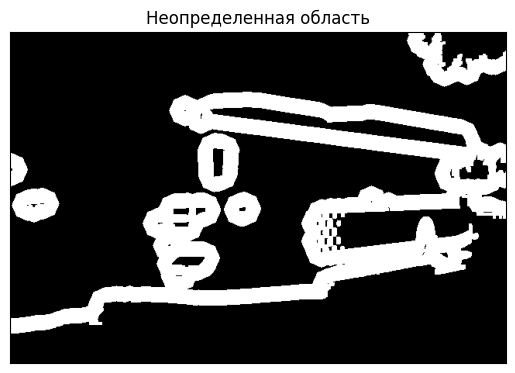

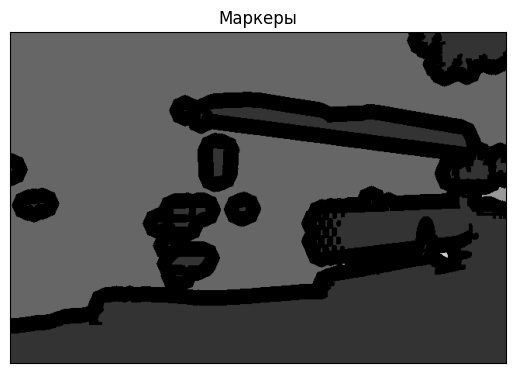

In [7]:
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown, 'gray')
plt.title("Неопределенная область"), plt.xticks([]), plt.yticks([])
plt.show()
markers = cv2.connectedComponents(sure_fg)[1]
markers = markers+1 # прибавляем 1, чтобы избежать 0 в областях, которые определены
markers[unknown==255] = 0
plt.imshow(markers, 'gray')
plt.title("Маркеры"), plt.xticks([]), plt.yticks([])
plt.show()

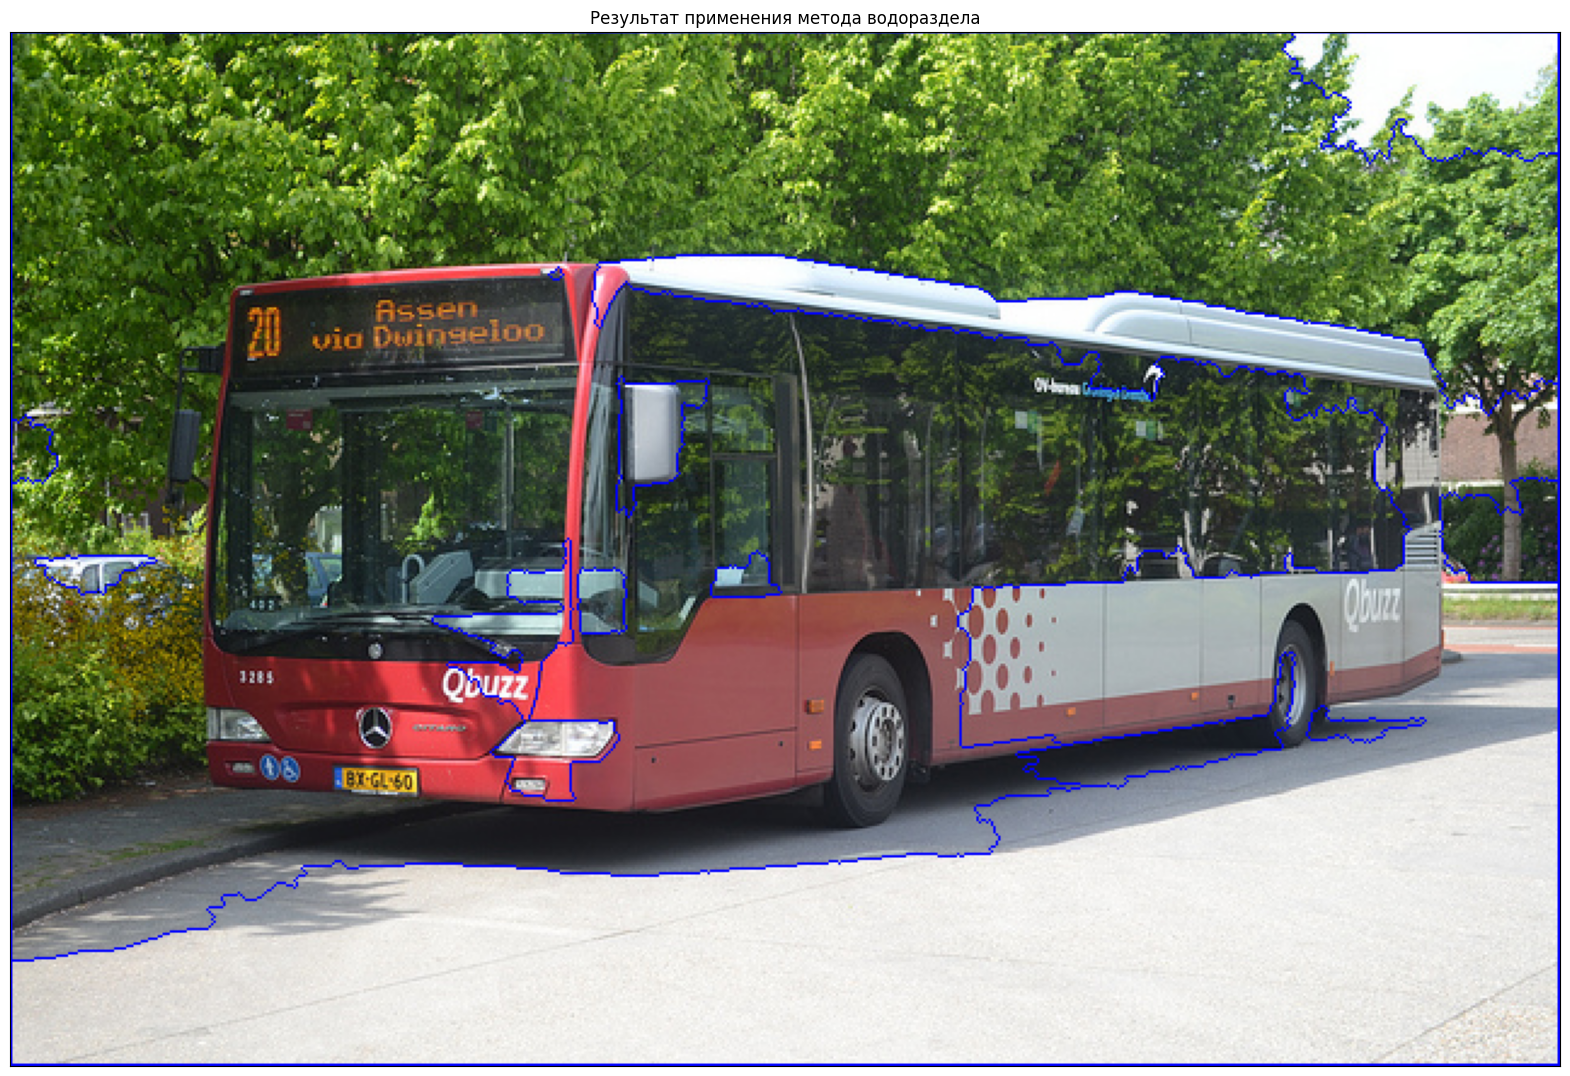

In [8]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [0,0,255]
fig = plt.figure(figsize=(20,20))
plt.imshow(img)
plt.title("Результат применения метода водораздела"), plt.xticks([]), plt.yticks([])
plt.show()

In [123]:
print(img.shape)
#print(markers)

unique, counts = np.unique(markers, return_counts=True)

# Подсчет общего количества пикселей
total_pixels = img.shape[0] * img.shape[1]

# Вычисление доли площади для каждой области
areas = dict(zip(unique, counts))
areas_percentages = {key: value/total_pixels for key, value in areas.items()}

# Вывод результатов
print("Доля площади фона:", areas_percentages.get(1, 0))
print("Доля площади переднего плана :", areas_percentages.get(2, 0))
print("Доля площади границы correct:", areas_percentages.get(-1, 0))

(427, 640, 3)
Доля площади фона: 0.34901566159250585
Доля площади переднего плана : 0.6173777810304449
Доля площади границы correct: 0.020473507025761124


\

In [96]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)

import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model = model.eval().cpu()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [97]:
!gdown 14CSVdok0NTd9NRHKv2WXg34Z7Wykui8A
image_file = '/content/Comp_Vision_Task_5_File_6.jpg'

Downloading...
From: https://drive.google.com/uc?id=14CSVdok0NTd9NRHKv2WXg34Z7Wykui8A
To: /content/example_image.jpg
100% 164k/164k [00:00<00:00, 65.7MB/s]


In [98]:
t = time.time()
image = PIL.Image.open(image_file)
image_tensor = torchvision.transforms.functional.to_tensor(image).cpu()
output = model([image_tensor])[0]
print('Время распознавания: %.3fs' % (time.time() - t))

Время распознавания: 10.010s


In [99]:
output.keys()

dict_keys(['boxes', 'labels', 'scores', 'masks'])

In [100]:
coco_names = ['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [101]:
result = {}
result['masks'] = []
result['labels'] = []
result['scores'] = []
result['boxes'] = []

for i in range(len(output['scores'])):
  if output['scores'][i] <= 0.5:
    continue
  # Исправляем маски
  one_mask = output['masks'][i][0].cpu().numpy()
  one_mask[one_mask >= np.max(one_mask) * 0.5] = 1
  one_mask[one_mask < np.max(one_mask) * 0.5] = 0
  result['masks'].append(one_mask)
  # Исправляем коробки
  result['boxes'].append(output['boxes'][i].int().cpu().numpy())
  # Добавляем остальное
  result['scores'].append(output['scores'][i].cpu().numpy())
  result['labels'].append(output['labels'][i].cpu().numpy())

bus
0.99931324
69
(70, 92)
533
237


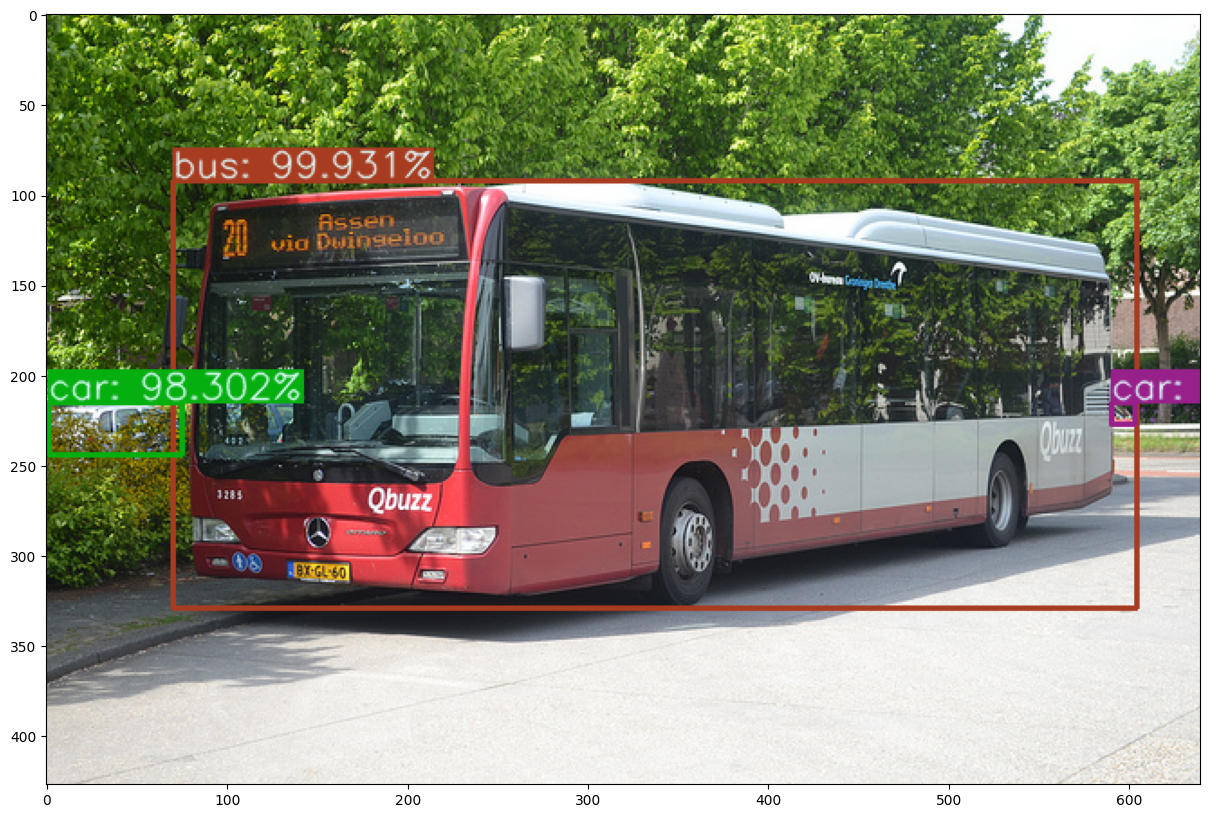

In [114]:
colors = [[random.randint(0, 255) for _ in range(3)] for _ in coco_names]

result_image = np.array(image.copy())
for box, label, score, mask in zip(result['boxes'], result['labels'], result['scores'], result['masks']):
  color = random.choice(colors)

  # draw box
  tl = round(0.002 * max(result_image.shape[0:2]))+1  # line thickness
  c1, c2 = (box[0], box[1]), (box[2], box[3])
  cv2.rectangle(result_image, c1, c2, color, thickness=tl)
  # draw text
  display_txt = "%s: %.3f%%" % (coco_names[label], 100*score)
  if coco_names[label] == 'bus':
    print(coco_names[label])
    print(score)
    print(box[0]-tf)
    print(c1)
    print(c2[0]-box[0]-tf)
    print(c2[1]-c1[1])
  tf = max(tl - 1, 1)  # font thickness
  t_size = cv2.getTextSize(display_txt, 0, fontScale=tl / 3, thickness=tf)[0]
  c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3


  cv2.rectangle(result_image, c1, c2, color, -1)  # filled
  cv2.putText(result_image, display_txt, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

plt.figure(figsize=(15, 10))
plt.imshow(result_image)

(427, 640)


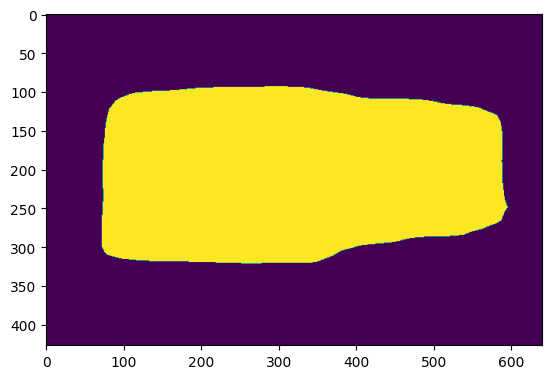

In [154]:
#bus это 0

image_array= plt.imshow(result['masks'][0]).get_array()

# Получим форму изображения
image_shape = image_array.shape
print(image_shape)

In [144]:

import matplotlib.pyplot as plt
import numpy as np

In [189]:


# Получаем данные изображения
image_array = np.array(result['masks'][0])

# Задаем пороговое значение для определения объекта на изображении
threshold = 1

# Создаем переменную для подсчета пикселей объекта
object_pixels = 0


for row in image_array:
    for pixel in row:
        if pixel < threshold:
            object_pixels += 1
            #print(pixel)



# Вычисляем долю площади объекта относительно всей площади изображения
total_pixels = image_array.shape[0] * image_array.shape[1]
object_pixel_ratio = object_pixels / total_pixels


print("Количество пикселей объекта на изображении из plt.imshow: ", object_pixels)
print("Доля пикселей объекта относительно всего изображения: ", object_pixel_ratio)



Количество пикселей объекта на изображении из plt.imshow:  169077
273280
Доля пикселей объекта относительно всего изображения:  0.6186951112412178
